##1. Load the Dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/train.csv')

# Display the first few rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##2. Data Cleaning

In [2]:
# Check for missing values
df.isnull().sum()

# Fill missing values for 'Age' with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing values for 'Embarked' with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to a large number of missing values
df.drop(columns=['Cabin'], inplace=True)

# Convert 'Survived', 'Pclass', 'Sex', 'Embarked' to categorical data type
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

# Check for duplicates and remove if any
df.drop_duplicates(inplace=True)

# Display the first few rows after cleaning
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## 3. Exploratory Data Analysis (EDA)

In [3]:
# Summary statistics of numerical columns
df.describe()

# Summary statistics of categorical columns
df.describe(include=['category'])

,Survived,Pclass,Sex,Embarked
count,891,891,891,891
unique,2,3,2,3
top,0,3,male,S
freq,549,491,577,646


Visualizations

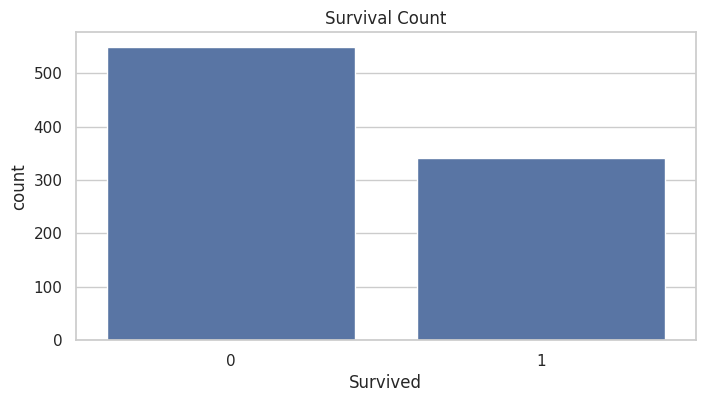

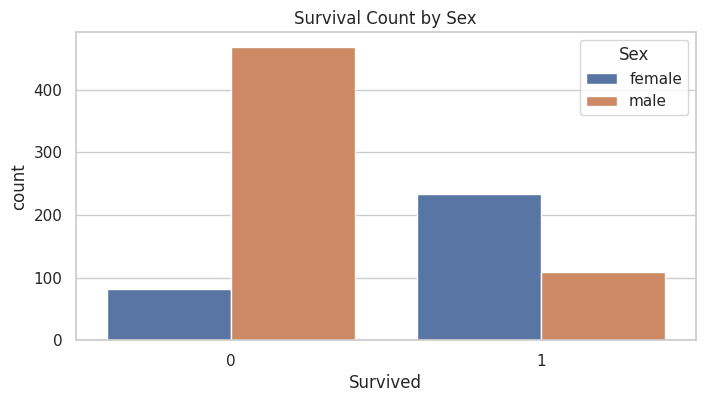

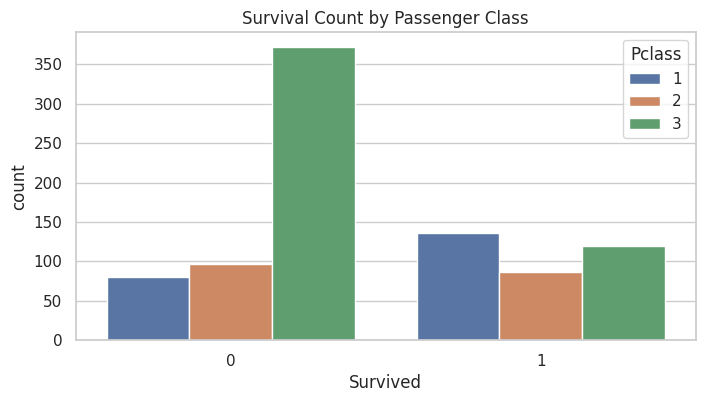

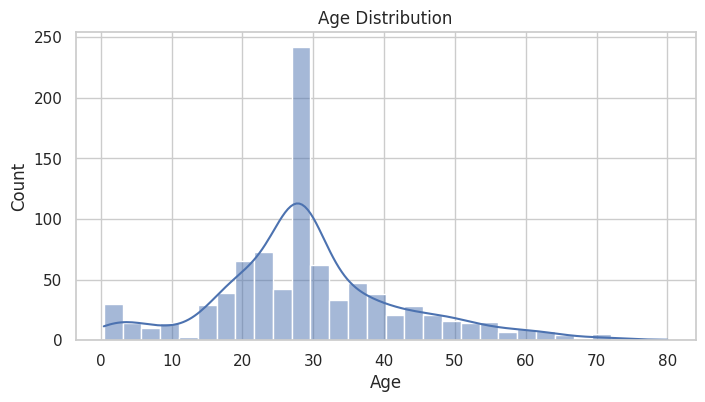

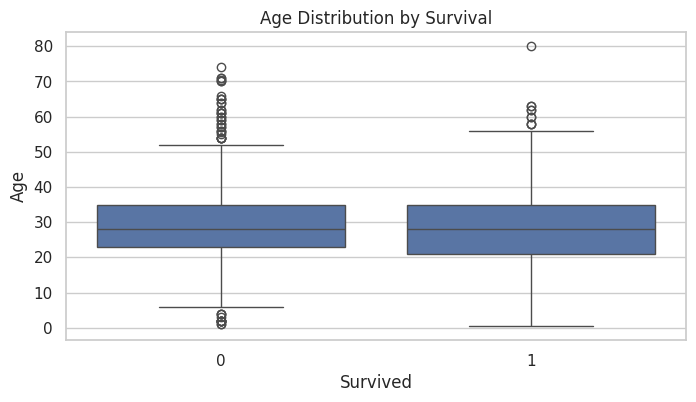

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style='whitegrid')

# Bar plot of Survived
plt.figure(figsize=(8, 4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# Bar plot of Survived by Sex
plt.figure(figsize=(8, 4))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Sex')
plt.show()

# Bar plot of Survived by Pclass
plt.figure(figsize=(8, 4))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

# Histogram of Age
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Box plot of Age by Survived
plt.figure(figsize=(8, 4))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

Relationship Analysis

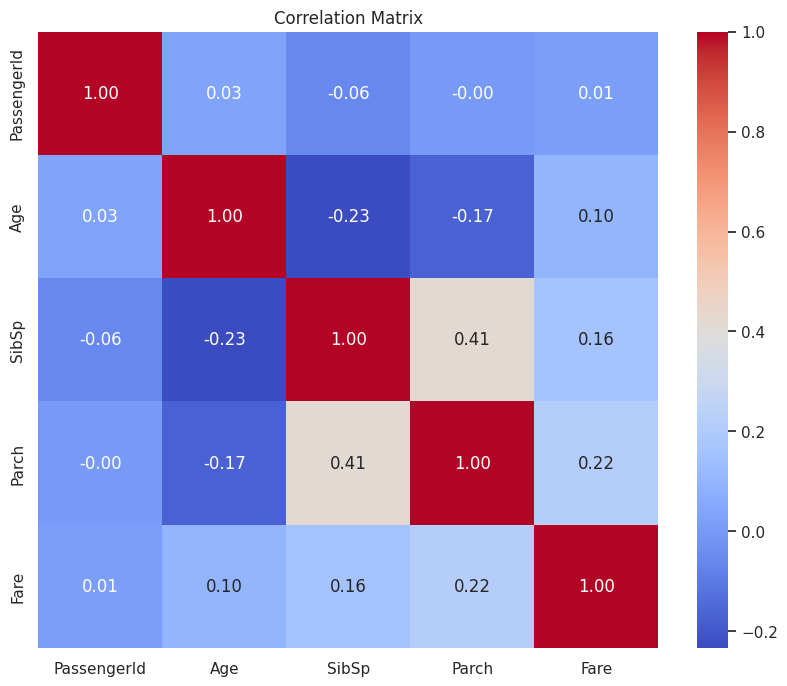

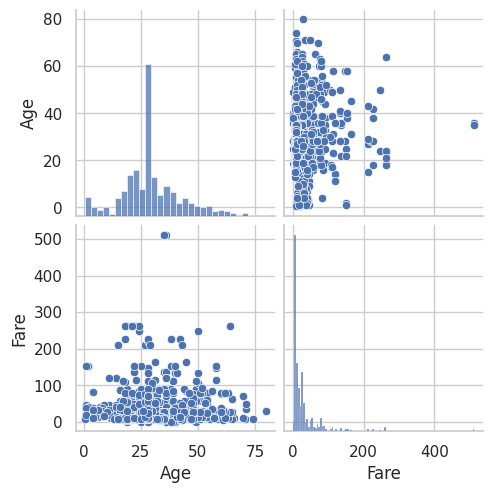

In [8]:
# Correlation matrix for numerical variables
numerical_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Pair plot for selected numerical variables
sns.pairplot(df[['Age', 'Fare', 'Survived']].dropna())
plt.show()